In [306]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adam

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import cross_validation
from sklearn.decomposition import PCA


iris = load_iris()

# Data Preperation

We will work with the Iris data set which is a standard toy dataset for machine learning model evaluation. 

## One Hot Encoding
Iris data set consists of 3 class of Iris flowers. The data comes in the format where each element of `y` corresponds to one integer which uniquely identifies the flower class. Since, the numerical values of y are of no use to us as y is a categorical variable hence it will be more approapriate to convert it into one hot vectors as followes:

| Class | One Hot Vector |
| ------------- |:-------------:|
| 0 | [1, 0, 0] |
| 1 | [0, 1, 0] |
| 2 | [0, 0, 1] |

## Feature Scaling

Feature scaling is a very important step when training neural network models. Feature scaling ensures that no feature dominates the prediction process because of the high range of values which it acquires for every instance. A common way of using feature scaling is by processing the features so that they have mean = 0.0 and standard deviation = 1.0. Without this step the neural network in most cases will not converge. 

**PS: I tried the neural network without feature scaling and was getting very bad accuracy sometimes as close to 0.**


In [307]:
X_org, y = iris.data, iris.target
print "Classes present in IRIS", iris.target_names

# Convert y to one hot vector for each category
enc = OneHotEncoder()
y= enc.fit_transform(y[:, np.newaxis]).toarray()

# **VERY IMPORTANT STEP** Scale the values so that mean is 0 and variance is 1.
# If this step is not performed the Neural network will not converge. The logistic regression model might converge.
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
X.shape, y.shape

((150L, 4L), (150L, 3L))

In [276]:
# Implement Model in Keras
model = Sequential()
model.add(Dense(X.shape[1], 2, init='uniform', activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(2, 2, init='uniform', activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(2, y.shape[1], init='uniform', activation='softmax'))

#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
sgd = SGD()

In [308]:
# Compile the model using theano
model.compile(loss='categorical_crossentropy', optimizer="rmsprop")

In [268]:
"""
Use this cell only if you want to reset the weights of the model. 
"""
"""
#print model.get_weights()
model.set_weights(np.array([np.random.uniform(size=k.shape) for k in model.get_weights()]))
print model.to_yaml()
model.optimizer.lr = 0.01
model.optimizer.decay = 0.
model.optimizer.momentum = 0.
model.optimizer.nesterov = False
"""
# Done

'\n#print model.get_weights()\nmodel.set_weights(np.array([np.random.uniform(size=k.shape) for k in model.get_weights()]))\nprint model.to_yaml()\nmodel.optimizer.lr = 0.01\nmodel.optimizer.decay = 0.\nmodel.optimizer.momentum = 0.\nmodel.optimizer.nesterov = False\n'

In [358]:
# Perform cross validated training
cond = (y[:,0] == 1) | (y[:,1] == 1) | (y[:,2] == 1)
kf = cross_validation.KFold(X[cond].shape[0], n_folds=10, shuffle=True)
scores = []
for train_index, test_index in kf:
    model.fit(X[cond][train_index], y[cond][train_index], nb_epoch=10, batch_size=200, verbose=0)
    scores.append(model.evaluate(X[cond][test_index], y[cond][test_index], show_accuracy=1))
model.fit(X, y, nb_epoch=100, batch_size=200, verbose=0)
scores.append(model.evaluate(X, y, show_accuracy=1))
print scores
print np.mean(np.array(scores), axis=0)

150/150 [==============================] - 0s     
[[0.37049213051795959, 0.93333333333333335], [0.22947035729885101, 1.0], [0.31287369132041931, 1.0], [0.24303504824638367, 1.0], [0.35789096355438232, 1.0], [0.40838631987571716, 0.93333333333333335], [0.38458853960037231, 0.93333333333333335], [0.42452824115753174, 0.93333333333333335], [0.42859283089637756, 0.8666666666666667], [0.50915008783340454, 0.93333333333333335], [0.36626123507817587, 0.95333333333333337]]
[ 0.36684268  0.95333333]


In [344]:
print model.predict_classes(X[cond][test_index]), np.argmax(y[cond][test_index], axis=1)
print set(model.predict_classes(X))

15/15 [==============================] - 0s
[0 0 0 0 1 1 2 1 2 2 2 2 2 2 2] [0 0 0 0 1 1 1 1 2 2 2 2 2 2 2]
150/150 [==============================] - 0s     
set([0, 1, 2])


In [325]:
logit = Sequential()
logit.add(Dense(X.shape[1], y.shape[1], init='uniform', activation='softmax'))
logit_sgd = SGD()

In [326]:
logit.compile(loss='categorical_crossentropy', optimizer=logit_sgd)

In [361]:
scores = []
kf = cross_validation.KFold(X.shape[0], n_folds=10)
for train_index, test_index in kf:
    logit.fit(X[train_index], y[train_index], nb_epoch=100, batch_size=200, verbose=0)
    scores.append(logit.evaluate(X[test_index], y[test_index], show_accuracy=1))
print scores
print np.mean(np.array(scores), axis=0)

15/15 [==============================] - 0s
[[0.012903307564556599, 1.0], [0.0154546108096838, 1.0], [0.03122049942612648, 1.0], [0.16326306760311127, 1.0], [0.24762265384197235, 0.93333333333333335], [0.30116969347000122, 0.8666666666666667], [0.10703837871551514, 1.0], [0.14851371943950653, 0.93333333333333335], [0.25847020745277405, 0.8666666666666667], [0.12019756436347961, 1.0]]
[ 0.14058537  0.96      ]


# Plotting decision boundaries

We would like to see what decision boundaries is the model learning. However, one issue with plotting our data is that `X` consists of $4$ dimensional feature vectors. Hence, we transform each feature vector in `X` to a $2d$ vector using Principal Component Analysis (PCA). The vectors obtained from **PCA** are then used for showing the points in a $2d$ plane and the decision boundaries of each classifier are shown as well. 

5994/5994 [==============================] - 0s     


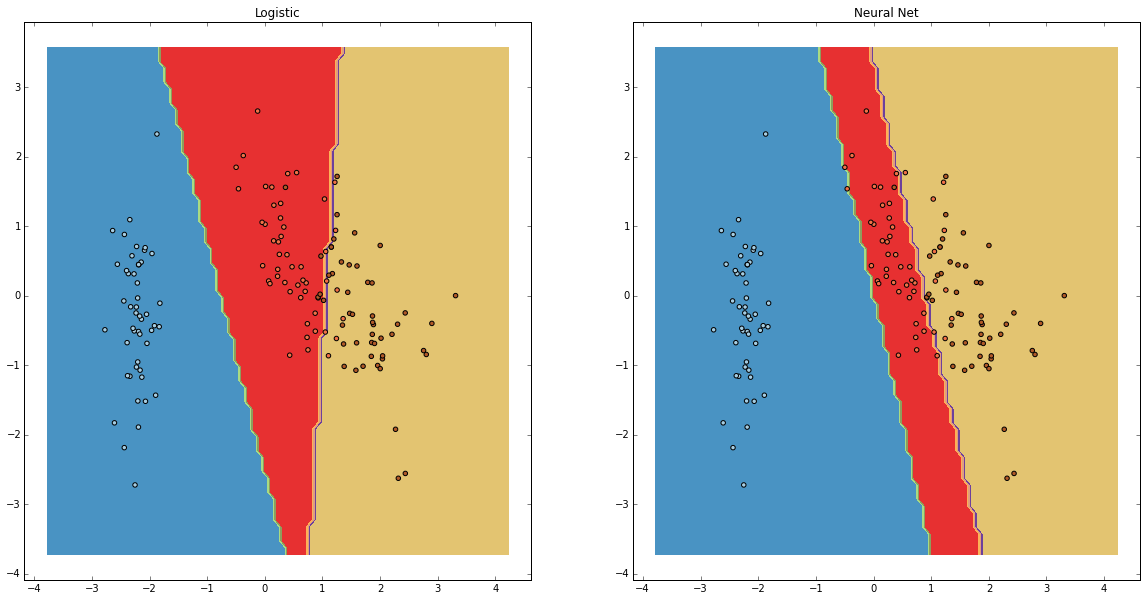

In [357]:
pca = PCA(n_components=2)
X_t = pca.fit_transform(X)

h = 0.1
x_min, x_max = X_t[:, 0].min() - 1, X_t[:, 0].max() + 1
y_min, y_max = X_t[:, 1].min() - 1, X_t[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, ax = plt.subplots(1,2, figsize=(20,10))
for i, v in enumerate({"Neural Net": model, "Logistic": logit}.items()):
    # here "model" is your model's prediction (classification) function
    Z = v[1].predict_classes(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])) 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    ax[i].contourf(xx, yy, Z, cmap=plt.cm.Paired)
    #ax[i].set_axis('off')
    # Plot also the training points
    ax[i].scatter(X_t[:, 0], X_t[:, 1], c=np.argmax(y, axis=1), cmap=plt.cm.Paired)
    ax[i].set_title(v[0])


# Final Analysis

From our analysis the logistic regression classifier performs slightly better than the neural network classifier. 

| Classifier | Accuracy |
|:----------:|:--------:|
| Logistic Regression | $96\%$ |
| Neural Network | $95.33\%$ |

 * One of the major reason for logistic regression classifier performing better than neural net can be attributed to the fact that the number of training examples are very few (150). 
 * The decision boundaries learned by both classifiers are linear in the PCA space. However, logistic regression classifier learns better decision boundary than the neural network. Hence, we can say that the neural network is trying to overfit.
 * A good approach can be to try training the network with different regularization than Dropout i.e. $L1$ and $L2$ regularization. 